## Mission: It's Your Turn!

### 1. 본문에서 언급된 Featurn를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.
- Hint: Fare? Sibsp? Parch?


In [9]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 데이터 불러오기

titanic_df = pd.read_csv("./train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
# 여행을 간 사람들중 자신의 배우자와 간 사람들이 얼마나 되는지??또한 배우자와 같이 여행을 갔을때 주로 어떤 클래스를 탑승했는지?
titanic_df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [66]:
# titanic에서 배우자와 같이 간 사람의 수

titanic_df[titanic_df['SibSp'] ==1].count()

PassengerId    209
Survived       209
Pclass         209
Name           209
Sex            209
Age            183
SibSp          209
Parch          209
Ticket         209
Fare           209
Cabin           69
Embarked       209
dtype: int64

In [65]:
# 배우자랑 같이가면서 평균적으로 어떤 클래스를 탑승 했는지?

titanic_df[titanic_df['SibSp'] ==1].groupby('SibSp').mean()['Pclass']

SibSp
1    2.057416
Name: Pclass, dtype: float64

In [67]:
titanic_df[titanic_df['SibSp'] ==0].groupby('SibSp').mean()['Pclass']

SibSp
0    2.351974
Name: Pclass, dtype: float64

In [1]:
sns.heatmap(titanic_df[['Pclass','SibSp']].groupby(['Pclass']).mean())
plt.show()


NameError: name 'sns' is not defined

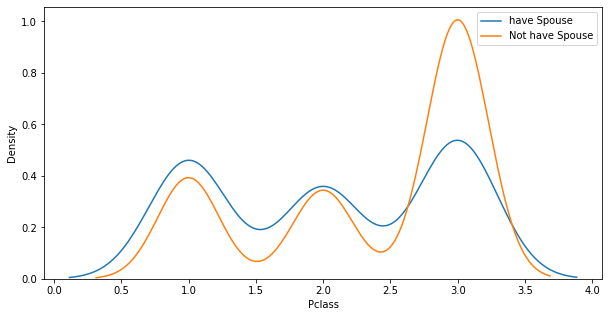

In [44]:
## SibSp 1, 0과 Age의 경향성

# figure(어떠한 그래프 도면) -> axis(figure안에 있는 x축 y축 틀) -> plot(그려지는거)

fig,ax = plt.subplots(1,1,figsize = (10,5))
sns.kdeplot(x=titanic_df[titanic_df.SibSp == 1]['Pclass'],ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.SibSp == 0]['Pclass'],ax=ax)
plt.legend(["have Spouse","Not have Spouse"])
plt.show()

### 2. Kaggle에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개이상 찾고 이를 시각화 해봅시다.

In [92]:
df = pd.read_csv("./StudentsPerformance.csv")
# 결측값 확인
df.isnull().count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

In [113]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


###  1. 여성 남성별로 과목별 점수 확인하기
- 남성, 여성별로 어떠한 과목에서 더 우위를 보일까?

In [112]:
df[['math score','reading score','writing score','gender']].groupby(['gender']).mean()

# 전체적으로 여성이 남성보다 읽기와 쓰기를 잘하는걸 볼 수있고 남성은 수학을 더 잘하는것을 볼 수 있다.

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


### 2. parental level of education의 따라 성적 분포가 어떻게 될까? 평균값으로 계산


In [114]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [119]:
df[['math score','reading score','writing score','parental level of education']].groupby(['parental level of education']).mean().sort_values(by='math score',ascending = False)

,math score,reading score,writing score
parental level of education,,,
master's degree,69.745763,75.372881,75.677966
bachelor's degree,69.389831,73.000000,73.381356
associate's degree,67.882883,70.927928,69.896396
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268
high school,62.137755,64.704082,62.448980


> #### 전체적으로 학위가 올라가면 올라갈수록 성적 분포가 점점 증가하는 경향을 띄고있다.

### 3. test preparation course 을 한사람과 안한사람들의 시험 평균차이는 얼마나 날까?

In [127]:
df[df['test preparation course'] == "completed"].mean()

math score       69.695531
reading score    73.893855
writing score    74.418994
dtype: float64

In [129]:
df[df['test preparation course'] == "none"].mean()

math score       64.077882
reading score    66.534268
writing score    64.504673
dtype: float64

#### 무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다:

1. 데이터를 뽑아 봅시다.
    - 각 데이터는 어떤 자료형을 가지고 있나요?
    - 데이터에는 **결측치**는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?
    - 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding
2. 데이터에 대한 가설을 세워봅시다.
    - 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
    - 가설은 명확할수록 좋습니다 ex) Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다!
3. 가설을 검증하기 위한 증거를 찾아봅시다.
    - 이 증거는 한눈에 보이지 않을 수도 있습니다. 우리가 다룬 여러 Technique를 써줘야합니다.
    - `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
    - `.merge()`를 통해서 두개 이상의 dataFrame을 합치면 어떨까요?
    - 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?
    